## 이진분류 모델을 구현
* 대상 : 당뇨병 데이터
* 분류기준 : 당뇨병 환자/ 아닌사람
* 입력 데이터 : 혈당을 제외한 데이터 중 선택

1. acuuarcy
2. 평가지표
3. feature importance

패키지

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 통계함수가 들어있는 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

데이터호출

In [2]:
dia = load_diabetes()
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
dia.target[dia.target>=126]=1

In [127]:
dia.target[dia.target>1] = 0

In [70]:
x_ns6 = dia.data[:,:9]

dia.data[dia.target>=126]
y_p = dia.target[dia.target>=126]
y_np = dia.target[dia.target<126]

In [151]:
x_train,x_test,y_train,y_test = train_test_split(
                            dia.data,dia.target,test_size=0.2,random_state=12345)

In [152]:
y_train

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1.

In [153]:
dt = DecisionTreeClassifier(random_state=12345,max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=12345)

In [154]:
y_pred = dt.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.6966292134831461

In [145]:
print(y_pred)
print(y_test)

[0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.]


In [149]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[24, 16],
       [11, 38]], dtype=int64)

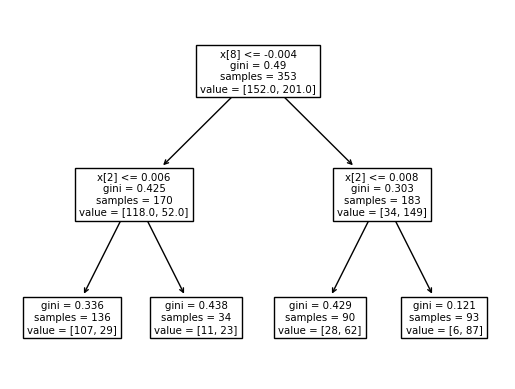

In [155]:
plot_tree(dt)
plt.show()

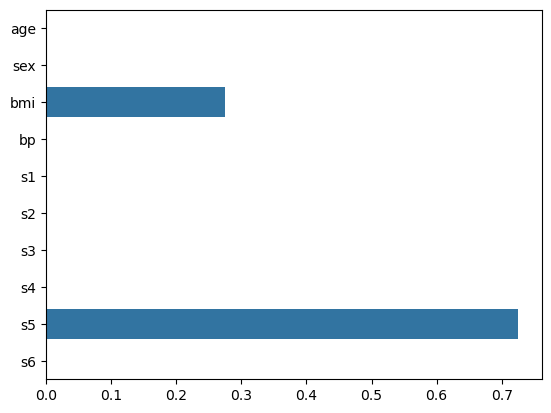

In [156]:
ax = sns.barplot(x=dt.feature_importances_, y=dia.feature_names)
plt.show()